In [10]:
# dict_ = {"n_neighbors": np.arange(1,200),
#         "weights" : ['uniform', 'distance'],
#         "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#         "leaf_size" : np.arange(1,10)}

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%config Completer.use_jedi = False

In [3]:
import pandas as pd
import os
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
os.getcwd()

'C:\\Users\\gmbas\\Downloads\\Files_lol_project'

In [5]:
os.chdir('datasets')

In [6]:
os.listdir()

["'df_blue_and_red_23_06'",
 '930_matches_df_19_05.csv',
 '932_matches_23_06',
 '932_matches_com_g_truth_final',
 '932_matches_df_21_06',
 '932_matches_df_23_06',
 'BOTHPARCIAL',
 'df_blue_23_06',
 'df_cheating_positions_870_matches_28_06.csv',
 'df_correto_20features_839partidas_sem_erro',
 'df_finalll_23_06',
 'df_final_provisorio',
 'df_NOT_cheating_positions_870_matches_28_06.csv',
 'df_red_23_06',
 'finallllllcomtarget']

In [6]:
df = pd.read_csv('df_cheating_positions_870_matches_28_06.csv')
df

,CS_min_ass_top_blue,CS_min_ass_jg_blue,CS_min_ass_mid_blue,CS_min_ass_adc_blue,CS_min_ass_sup_blue,CS_min_ass_top_red,CS_min_ass_jg_red,CS_min_ass_mid_red,CS_min_ass_adc_red,CS_min_ass_sup_red,...,MP_ass_jg_blue,MP_ass_mid_blue,MP_ass_adc_blue,MP_ass_sup_blue,MP_ass_top_red,MP_ass_jg_red,MP_ass_mid_red,MP_ass_adc_red,MP_ass_sup_red,target
0,4.756204,5.939718,4.573580,6.626648,1.976583,5.366882,4.747214,6.067965,5.895539,1.162788,...,6045.0,27869.0,139033.0,90591.0,60900.0,17226.0,104796.0,5702.0,6894.0,1
1,6.249752,3.867070,6.870524,5.623977,5.469181,5.649067,5.125936,6.146694,3.587890,0.740881,...,12382.0,39489.0,1173761.0,230329.0,2342839.0,25119.0,39085.0,120399.0,81033.0,0
2,5.340403,4.598162,4.825763,5.681439,1.080000,4.498963,6.289723,5.405575,4.766707,2.085663,...,35375.0,18062.0,30808.0,53165.0,10990.0,1209.0,11605.0,17510.0,1377402.0,1
3,5.976233,4.984266,2.671286,5.148903,0.363769,6.529087,6.166968,5.071400,5.178816,1.734322,...,191837.0,193851.0,27186.0,159593.0,464856.0,47094.0,58443.0,87329.0,19550.0,0
4,5.915913,4.925813,6.164462,5.484073,1.368294,7.049121,5.477247,5.392639,6.682713,0.815051,...,101033.0,1233.0,34450.0,15688.0,11980.0,22250.0,52517.0,71398.0,11441.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,4.687110,5.788344,6.129966,4.503127,5.044911,6.509041,6.566786,6.393877,6.451557,1.583707,...,1784.0,39021.0,40178.0,1543.0,63574.0,5840.0,21496.0,87591.0,1505092.0,0
867,3.858181,4.125231,3.242855,5.436693,0.206679,4.890833,4.194576,4.323031,5.414535,3.042890,...,10650.0,35904.0,56382.0,495855.0,66034.0,2743.0,709380.0,721154.0,202130.0,1
868,4.858114,6.261634,5.456084,6.332916,1.513932,4.932086,5.188566,5.850610,4.896937,4.486468,...,1414.0,85240.0,100878.0,543559.0,6775.0,946303.0,12643.0,3374.0,2092.0,1
869,4.367879,4.490651,6.566390,5.920417,1.941900,5.424155,5.287674,3.839915,4.261205,0.475627,...,7072.0,37538.0,139703.0,150471.0,152271.0,8974.0,27138.0,9033.0,178701.0,0


In [9]:
df.columns

Index(['CS_min_ass_top_blue', 'CS_min_ass_jg_blue', 'CS_min_ass_mid_blue',
       'CS_min_ass_adc_blue', 'CS_min_ass_sup_blue', 'CS_min_ass_top_red',
       'CS_min_ass_jg_red', 'CS_min_ass_mid_red', 'CS_min_ass_adc_red',
       'CS_min_ass_sup_red', 'kda_ass_top_blue', 'kda_ass_jg_blue',
       'kda_ass_mid_blue', 'kda_ass_adc_blue', 'kda_ass_sup_blue',
       'kda_ass_top_red', 'kda_ass_jg_red', 'kda_ass_mid_red',
       'kda_ass_adc_red', 'kda_ass_sup_red', 'MP_ass_top_blue',
       'MP_ass_jg_blue', 'MP_ass_mid_blue', 'MP_ass_adc_blue',
       'MP_ass_sup_blue', 'MP_ass_top_red', 'MP_ass_jg_red', 'MP_ass_mid_red',
       'MP_ass_adc_red', 'MP_ass_sup_red', 'target'],
      dtype='object')

In [10]:
df.describe()

,CS_min_ass_top_blue,CS_min_ass_jg_blue,CS_min_ass_mid_blue,CS_min_ass_adc_blue,CS_min_ass_sup_blue,CS_min_ass_top_red,CS_min_ass_jg_red,CS_min_ass_mid_red,CS_min_ass_adc_red,CS_min_ass_sup_red,...,MP_ass_jg_blue,MP_ass_mid_blue,MP_ass_adc_blue,MP_ass_sup_blue,MP_ass_top_red,MP_ass_jg_red,MP_ass_mid_red,MP_ass_adc_red,MP_ass_sup_red,target
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,...,8.710000e+02,8.710000e+02,8.710000e+02,8.710000e+02,8.710000e+02,8.710000e+02,8.710000e+02,8.710000e+02,8.710000e+02,871.000000
mean,5.390984,5.126460,5.153453,5.331894,2.591199,5.368034,5.097328,5.131408,5.372022,2.591362,...,1.304477e+05,1.643539e+05,1.343254e+05,1.451339e+05,1.415697e+05,1.632349e+05,1.593892e+05,1.252113e+05,1.538658e+05,0.507463
std,1.129284,1.085158,1.175634,1.195678,1.575565,1.099221,1.106594,1.214339,1.218619,1.613432,...,2.892790e+05,3.188015e+05,2.218494e+05,2.393710e+05,3.508592e+05,4.743286e+05,3.056307e+05,2.161488e+05,2.598148e+05,0.500232
min,0.259385,0.003120,0.005037,0.114806,0.056887,0.578409,0.005014,0.967550,0.003550,0.000619,...,1.600000e+02,2.080000e+02,1.120000e+02,1.520000e+02,1.110000e+02,1.150000e+02,2.050000e+02,1.170000e+02,1.160000e+02,0.000000
25%,4.822939,4.599133,4.602477,4.790359,1.294417,4.751683,4.606458,4.521888,4.766208,1.267347,...,1.351050e+04,1.871450e+04,2.056500e+04,1.775800e+04,1.252700e+04,1.345500e+04,1.503900e+04,1.872600e+04,1.938700e+04,0.000000
50%,5.469077,5.234699,5.303450,5.491678,2.176626,5.436885,5.229769,5.325695,5.565511,2.142493,...,3.758300e+04,5.782500e+04,5.592200e+04,6.088100e+04,3.833300e+04,4.060500e+04,4.999900e+04,5.609000e+04,5.698300e+04,1.000000
75%,6.107387,5.789639,5.911828,6.100654,3.731389,6.147848,5.782401,5.903002,6.168040,3.817320,...,1.215105e+05,1.663265e+05,1.437685e+05,1.702410e+05,1.169235e+05,1.242500e+05,1.602280e+05,1.376925e+05,1.810525e+05,1.000000
max,8.256664,8.265241,8.414453,8.655552,7.107505,8.437891,7.985336,8.053961,8.341881,7.214272,...,3.460805e+06,3.040368e+06,2.974271e+06,2.234451e+06,6.850851e+06,8.835268e+06,3.916739e+06,2.974271e+06,2.928283e+06,1.000000


In [11]:
df.shape

(871, 31)

In [12]:
df.dropna().shape


(871, 31)

In [13]:
y = df['target']
X = df.drop('target',axis = 1)
#df[0:160], df[161:]

In [14]:
X.shape

(871, 30)

In [15]:
y.shape

(871,)

In [16]:
# cutoff1 = round(X.shape[0]*0.6)
# cutoff2 = round(X.shape[0]*0.8)
# X_train,X_val,X_test = X[0:cutoff1], X[cutoff1:cutoff2],X[cutoff2:]
# y_train,y_val,y_test = y[0:cutoff1],y[cutoff1:cutoff2], y[cutoff2:]

In [17]:
cutoff1 = round(X.shape[0]*0.6)
cutoff2 = round(X.shape[0]*0.8)
X,X_test = X[0:cutoff2],X[cutoff2:]
y,y_test = y[0:cutoff2],y[cutoff2:]

In [18]:
#Check if dimensions are correct
y

0      1
1      0
2      1
3      0
4      1
      ..
692    1
693    0
694    1
695    1
696    1
Name: target, Length: 697, dtype: int64

In [19]:
#s_scaler = StandardScaler()

In [20]:
#s_scaler.fit(X_train)

In [21]:
#X_val.describe()

In [22]:
# X_train = s_scaler.transform(X_train)
# X_val = s_scaler.transform(X_val)
# X_test = s_scaler.transform(X_test)

In [23]:
log_reg = LogisticRegression()

In [24]:
log_reg.fit(X,y)

LogisticRegression()

In [27]:
#train score
log_reg.score(X,y)

0.5681492109038737

In [28]:
#test score
log_reg.score(X_test,y_test)

0.42528735632183906

In [29]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [30]:
y_test.shape

(174,)

In [31]:
y_pred_prob.shape

(174,)

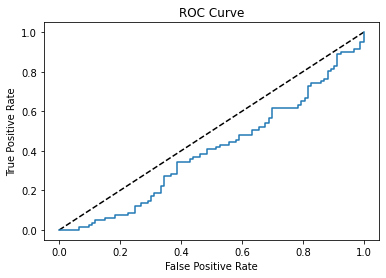

In [32]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [33]:
auc = roc_auc_score(y_test,y_pred_prob)
auc

0.3993097039692021

**KNN**

In [34]:
knn = KNeighborsClassifier()

In [35]:
knn.fit(X,y)

KNeighborsClassifier()

In [36]:
knn.score(X,y)

0.6642754662840746

In [37]:
knn.score(X_test,y_test)

0.4540229885057471

In [38]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

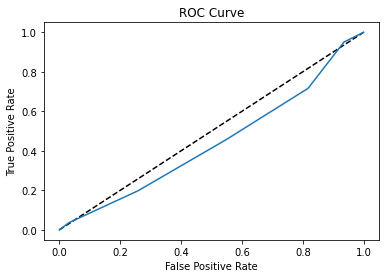

In [39]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [40]:
auc = roc_auc_score(y_test,y_pred_prob)
auc

0.4411920881454931

In [41]:
y_pred = knn.predict(X_test)

In [42]:
cmatrix = confusion_matrix(y_test,y_pred)
cmatrix

array([[42, 51],
       [44, 37]], dtype=int64)

<AxesSubplot:title={'center':'Matriz de confusão'}>

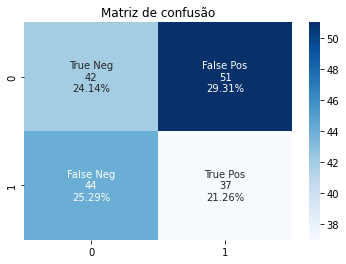

In [43]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cmatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmatrix.flatten()/np.sum(cmatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Matriz de confusão')
sns.heatmap(cmatrix, annot=labels, fmt='', cmap='Blues')

**Random Forest**

In [44]:
RF = RandomForestClassifier()

In [45]:
RF.fit(X,y)

RandomForestClassifier()

In [46]:
RF.score(X,y)

1.0

In [47]:
RF.score(X_test,y_test)

0.5344827586206896

In [48]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = RF.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

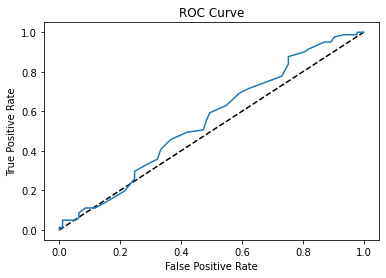

In [49]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [51]:
roc_auc_score(y_test,y_pred_prob)

0.5536306916235232

# **Optimizing Hyperparameters**

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [54]:
from sklearn.model_selection import TimeSeriesSplit

In [55]:
tscv = TimeSeriesSplit()

In [56]:
tscv.split(X)

<generator object TimeSeriesSplit.split at 0x000002BFD8C43920>

In [57]:
for train_index, val_index in tscv.split(X):
    print(f"train = {train_index},val_index = {val_index}")

train = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116],val_index = [117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232]
train = [  0   1   2   3   4   5

In [58]:
# versão modificada leave one out CV
# n_samples = 10

# Train      Test

# 1           10
# 2
# 3
# 4
# 5
# 6
# 7
# 8
# 9



# Train      Test

# 1           9
# 2
# 3
# 4
# 5
# 6
# 7
# 8


# Train      Test

# 1           8
# 2
# 3
# 4
# 5
# 6
# 7



In [59]:
def range_splitter(n_samples,iterations):
    both_indexes = []
    for i in range(iterations):
        test_index = n_samples -  i - 1
        train_index_list = np.arange(0,test_index)
        test_index_list = np.array([test_index])
        both_indexes.append([train_index_list,test_index_list])
    return both_indexes

In [60]:
train_scores = []
val_scores = []
hyper_params = []
#n_estimators,max_features
for max_depth_ in np.arange(1,100):
    for n_estimators_ in np.arange(10,110,10):
        for max_features_ in (None,"sqrt"):
            train_ = []
            val_ = []
            for train_index, val_index in tscv.split(X):
                #X = pd.DataFrame(X.iloc[train_index,:])
                #print("TRAIN:", train_index, "TEST:", test_index)
                rf = RandomForestClassifier(n_estimators=n_estimators_, 
                                            max_depth=max_depth_, 
                                            max_features=max_features_,
                                            random_state=42)
                #print(train_index,np.shape)
                X_train2, X_val2 = X.iloc[train_index,:], X.iloc[val_index,:]
                y_train2, y_val2 = y.iloc[train_index], y.iloc[val_index]
                rf.fit(X_train2,y_train2)
            #     y_train_pred = rf.predict(X_train2)
            #     y_val_pred = rf.predict(X_val2)
                train_.append(rf.score(X_train2,y_train2))
                val_.append(rf.score(X_val2,y_val2))
                
            train_scores.append(train_)    
            val_scores.append(val_)
            hyper_params.append((max_depth_,n_estimators_,max_features_))
            print(f"train mean = {np.mean(np.array(train_))},val mean = {np.mean(np.array(val_))}")




train mean = 0.6276690202866678,val mean = 0.5103448275862068
train mean = 0.6139825388271406,val mean = 0.48103448275862065
train mean = 0.6382242075676733,val mean = 0.5206896551724138
train mean = 0.6203880566590273,val mean = 0.5086206896551724
train mean = 0.631959379914276,val mean = 0.5206896551724138
train mean = 0.6216772735729638,val mean = 0.49827586206896546
train mean = 0.6338449607175378,val mean = 0.5206896551724138
train mean = 0.6401334750140626,val mean = 0.5017241379310345
train mean = 0.6459378081017987,val mean = 0.5206896551724138
train mean = 0.6483687158317427,val mean = 0.5120689655172412
train mean = 0.6511457685095039,val mean = 0.5189655172413793
train mean = 0.6532005805749834,val mean = 0.5120689655172415
train mean = 0.6640792195816141,val mean = 0.5206896551724138
train mean = 0.6553843336382854,val mean = 0.5172413793103449
train mean = 0.6587459341867236,val mean = 0.5224137931034483
train mean = 0.6575783415591647,val mean = 0.5017241379310345
train m

train mean = 0.994178289750448,val mean = 0.5379310344827586
train mean = 0.9977923774376022,val mean = 0.55
train mean = 0.993919929118982,val mean = 0.5362068965517242
train mean = 0.9977923774376022,val mean = 0.55
train mean = 0.9949526313565036,val mean = 0.5482758620689655
train mean = 0.9978782508853101,val mean = 0.5517241379310345
train mean = 0.9961866092975018,val mean = 0.5379310344827586
train mean = 0.9690981061647415,val mean = 0.5189655172413793
train mean = 0.957067482202147,val mean = 0.5241379310344827
train mean = 0.9925161769707008,val mean = 0.5344827586206897
train mean = 0.9838923735566578,val mean = 0.5189655172413793
train mean = 0.9973327411026596,val mean = 0.5275862068965518
train mean = 0.9926879238661167,val mean = 0.5155172413793103
train mean = 0.9971039092792544,val mean = 0.5258620689655172
train mean = 0.9931455875129265,val mean = 0.5137931034482759
train mean = 0.9979353358132993,val mean = 0.5379310344827586
train mean = 0.9965871880163226,val mea

train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5413793103448276
train mean = 1.0,val mean = 0.5448275862068965
train mean = 1.0,val mean = 0.5568965517241379
train mean = 1.0,val mean = 0.5517241379310345
train mean = 1.0,val mean = 0.5482758620689655
train mean = 1.0,val mean = 0.5413793103448276
train mean = 1.0,val mean = 0.5413793103448276
train mean = 1.0,val mean = 0.5327586206896552
train mean = 1.0,val mean = 0.5448275862068965
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5603448275862069
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5482758620689655
train mean = 0.9728876326574134,val mean = 0.5120689655172413
train mean = 0.9818580170078353,val mean = 0.5086206896551724
train mean = 0.997430383236835,val mean = 0.5344827586206897
train mean = 0.9990827000182474,val mean = 0.5327586206896552
train mean = 1.0,val mean = 0.5206896551724137
t

train mean = 1.0,val mean = 0.5551724137931034
train mean = 1.0,val mean = 0.5362068965517242
train mean = 1.0,val mean = 0.5448275862068964
train mean = 1.0,val mean = 0.5413793103448276
train mean = 1.0,val mean = 0.556896551724138
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5482758620689655
train mean = 0.9733177401842952,val mean = 0.5137931034482759
train mean = 0.9825464851661829,val mean = 0.5051724137931035
train mean = 0.997430383236835,val mean = 0.5362068965517242
train mean = 0.9990827000182474,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5293103448275862
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5379310344827587
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5465517241379311
train mean = 1.0,val mean = 0.5362068965517242
train mean = 1.0,val mean = 0.543103448275862
trai

train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5465517241379311
train mean = 0.9733177401842952,val mean = 0.5137931034482759
train mean = 0.9825464851661829,val mean = 0.5051724137931035
train mean = 0.997430383236835,val mean = 0.5362068965517242
train mean = 0.9990827000182474,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5293103448275862
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.543103448275862
train mean = 1.0,val mean = 0.5534482758620689
train mean = 1.0,val mean = 0.5362068965517242
train mean = 1.0,val mean = 0.5448275862068965
train mean = 1.0,val mean = 0.5413793103448276
train mean = 1.0,val mean = 0.5586206896551724
tra

train mean = 0.997430383236835,val mean = 0.5362068965517242
train mean = 0.9990827000182474,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5293103448275862
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.543103448275862
train mean = 1.0,val mean = 0.5534482758620689
train mean = 1.0,val mean = 0.5362068965517242
train mean = 1.0,val mean = 0.5448275862068965
train mean = 1.0,val mean = 0.5413793103448276
train mean = 1.0,val mean = 0.5586206896551724
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5465517241379311
train mean = 0.9733177401842952,val mean = 0.5137931034482759
train mean = 0.9825464851661829,val mean = 0.5051724137931035
tra

train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.543103448275862
train mean = 1.0,val mean = 0.5534482758620689
train mean = 1.0,val mean = 0.5362068965517242
train mean = 1.0,val mean = 0.5448275862068965
train mean = 1.0,val mean = 0.5413793103448276
train mean = 1.0,val mean = 0.5586206896551724
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5465517241379311
train mean = 0.9733177401842952,val mean = 0.5137931034482759
train mean = 0.9825464851661829,val mean = 0.5051724137931035
train mean = 0.997430383236835,val mean = 0.5362068965517242
train mean = 0.9990827000182474,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5293103448275862
train mean = 1.0,val mean = 0.5379310344827586
tra

train mean = 1.0,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.543103448275862
train mean = 1.0,val mean = 0.5534482758620689
train mean = 1.0,val mean = 0.5362068965517242
train mean = 1.0,val mean = 0.5448275862068965
train mean = 1.0,val mean = 0.5413793103448276
train mean = 1.0,val mean = 0.5586206896551724
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5465517241379311
train mean = 0.9733177401842952,val mean = 0.5137931034482759
train mean = 0.9825464851661829,val mean = 0.5051724137931035
train mean = 0.997430383236835,val mean = 0.5362068965517242
train mean = 0.9990827000182474,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5293103448275862
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5482758620689656
tra

train mean = 1.0,val mean = 0.5413793103448276
train mean = 1.0,val mean = 0.5586206896551724
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5465517241379311
train mean = 0.9733177401842952,val mean = 0.5137931034482759
train mean = 0.9825464851661829,val mean = 0.5051724137931035
train mean = 0.997430383236835,val mean = 0.5362068965517242
train mean = 0.9990827000182474,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5293103448275862
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.543103448275862
train mean = 1.0,val mean = 0.5534482758620689
train mean = 1.0,val mean = 0.5362068965517242
train mean = 1.0,val mean = 0.5448275862068965
tra

train mean = 0.9825464851661829,val mean = 0.5051724137931035
train mean = 0.997430383236835,val mean = 0.5362068965517242
train mean = 0.9990827000182474,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5293103448275862
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.543103448275862
train mean = 1.0,val mean = 0.5534482758620689
train mean = 1.0,val mean = 0.5362068965517242
train mean = 1.0,val mean = 0.5448275862068965
train mean = 1.0,val mean = 0.5413793103448276
train mean = 1.0,val mean = 0.5586206896551724
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5465517241379311
train mean = 0.9733177401842952,val mean = 0.5137931034482759
tra

train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.543103448275862
train mean = 1.0,val mean = 0.5534482758620689
train mean = 1.0,val mean = 0.5362068965517242
train mean = 1.0,val mean = 0.5448275862068965
train mean = 1.0,val mean = 0.5413793103448276
train mean = 1.0,val mean = 0.5586206896551724
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5465517241379311
train mean = 0.9733177401842952,val mean = 0.5137931034482759
train mean = 0.9825464851661829,val mean = 0.5051724137931035
train mean = 0.997430383236835,val mean = 0.5362068965517242
train mean = 0.9990827000182474,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5293103448275862
tra

train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.543103448275862
train mean = 1.0,val mean = 0.5534482758620689
train mean = 1.0,val mean = 0.5362068965517242
train mean = 1.0,val mean = 0.5448275862068965
train mean = 1.0,val mean = 0.5413793103448276
train mean = 1.0,val mean = 0.5586206896551724
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5465517241379311
train mean = 0.9733177401842952,val mean = 0.5137931034482759
train mean = 0.9825464851661829,val mean = 0.5051724137931035
train mean = 0.997430383236835,val mean = 0.5362068965517242
train mean = 0.9990827000182474,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5293103448275862
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.560344827586207
tra

train mean = 1.0,val mean = 0.5448275862068965
train mean = 1.0,val mean = 0.5413793103448276
train mean = 1.0,val mean = 0.5586206896551724
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5465517241379311
train mean = 0.9733177401842952,val mean = 0.5137931034482759
train mean = 0.9825464851661829,val mean = 0.5051724137931035
train mean = 0.997430383236835,val mean = 0.5362068965517242
train mean = 0.9990827000182474,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.5293103448275862
train mean = 1.0,val mean = 0.5379310344827586
train mean = 1.0,val mean = 0.5310344827586206
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5396551724137931
train mean = 1.0,val mean = 0.560344827586207
train mean = 1.0,val mean = 0.5482758620689656
train mean = 1.0,val mean = 0.5344827586206897
train mean = 1.0,val mean = 0.543103448275862
train mean = 1.0,val mean = 0.5534482758620689
train mean = 1.0,val mean = 0.5362068965517242
tra

In [61]:
mean_arr_val = []
for arr in val_scores:
    mean_arr_val.append(np.mean(arr))
print(max(mean_arr_val))

0.5672413793103448


In [62]:
arr2 = np.array(mean_arr_val)
arr2#[mean_arr_val == 0.5867768595041324]

array([0.51034483, 0.48103448, 0.52068966, ..., 0.55862069, 0.53793103,
       0.54655172])

In [63]:
np.where(arr2 == 0.5672413793103448)

(array([389], dtype=int64),)

In [64]:
hyper_params[389]

(20, 50, 'sqrt')

In [65]:
RF2 = RandomForestClassifier(n_estimators=50,
                             max_depth = 20,
                             max_features = 'sqrt')

In [66]:
RF2.fit(X,y)

RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=50)

In [67]:
#train_score
RF2.score(X,y)

1.0

In [68]:
#test_score
RF2.score(X_test,y_test)

0.5229885057471264

In [69]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# rf.fit(X_train,y_train)
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = RF, 
#                                param_distributions = random_grid, 
#                                n_iter = 100, 
#                                cv = , 
#                                verbose=2, 
#                                random_state=42, 
#                                n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [70]:
# train_scores = []
# val_scores = []

# for train_index, val_index in tscv.split(X):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     #print(type(train_index))
#     rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features='auto',random_state=42)
#     train_index_list = list(train_index)
#     val_index_list = list(val_index)
#     X_train2, X_val2 = X[train_index_list[0]:train_index_list[-1]], X[val_index_list[0]:val_index_list[-1]]
#     y_train2, y_val2 = y[train_index_list[0]:train_index_list[-1]], y[val_index_list[0]:val_index_list[-1]]
#     rf.fit(X_train2,y_train2)
# #     y_train_pred = rf.predict(X_train2)
# #     y_val_pred = rf.predict(X_val2)
#     train_scores.append(rf.score(X_train2,y_train2))
#     val_scores.append(rf.score(X_val2,y_val2))

# print(f"train mean = {np.mean(np.array(train_scores))},test mean = {np.mean(np.array(val_scores))}")



# Lightgbm

In [71]:
from lightgbm import LGBMClassifier

In [72]:
lightgbm = LGBMClassifier()

In [73]:
lightgbm.fit(X,y)

LGBMClassifier()

In [74]:
lightgbm.score(X_test,y_test)

0.5632183908045977

In [75]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lightgbm.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

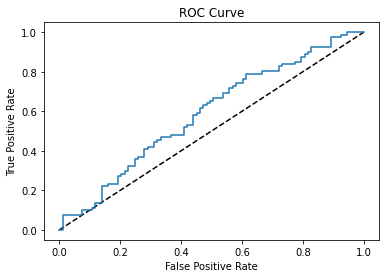

In [76]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [77]:
roc_auc_score(y_test,y_pred_prob)

0.5880791185450683

In [78]:
from sklearn import preprocessing

In [79]:
X_train = X
Y_train = y

In [80]:
lbl = preprocessing.LabelEncoder()
for col in X_train.columns:
  X_train[col] = lbl.fit_transform(X_train[col].astype(str))
  X_test[col] = lbl.fit_transform(X_test[col].astype(str))

In [81]:
import lightgbm as lgb
hyperparameters = {'boosting_type':'gbdt', 'num_leaves':2, 'max_depth':7, 'learning_rate':0.5, 'n_estimators':100, 'subsample_for_bin':50,'reg_lambda': 10}
booster = lgb.LGBMClassifier(**hyperparameters)
clf = booster.fit(X_train,Y_train,feature_name = list(X_train.columns) )
y_pred_train = clf.predict_proba(X_train).T[1]
y_pred_test = clf.predict_proba(X_test).T[1]




In [82]:
clf.score(X_train,Y_train)

0.6757532281205165

In [83]:
clf.score(X_test,y_test)

0.45977011494252873

In [84]:
cutoff1 = round(X.shape[0]*0.6)
cutoff2 = round(X.shape[0]*0.8)
X_train,X_val,X_test = X[0:cutoff1], X[cutoff1:cutoff2],X[cutoff2:]
y_train,y_val,y_test = y[0:cutoff1],y[cutoff1:cutoff2], y[cutoff2:]

In [85]:
from catboost import CatBoostClassifier, CatBoostRegressor

model = CatBoostClassifier(num_trees=1000,
                           eval_metric='Logloss', 
                           thread_count=-1,
                           random_seed=42)
          
model.fit(X_train, y_train,
          verbose=True,
          early_stopping_rounds=50,
          eval_set=[(X_val, y_val)])

Learning rate set to 0.025547
0:	learn: 0.6892016	test: 0.6918348	best: 0.6918348 (0)	total: 237ms	remaining: 3m 56s
1:	learn: 0.6842098	test: 0.6910984	best: 0.6910984 (1)	total: 249ms	remaining: 2m 4s
2:	learn: 0.6802726	test: 0.6912842	best: 0.6910984 (1)	total: 261ms	remaining: 1m 26s
3:	learn: 0.6759511	test: 0.6921443	best: 0.6910984 (1)	total: 272ms	remaining: 1m 7s
4:	learn: 0.6721937	test: 0.6929388	best: 0.6910984 (1)	total: 283ms	remaining: 56.3s
5:	learn: 0.6692795	test: 0.6933286	best: 0.6910984 (1)	total: 296ms	remaining: 49s
6:	learn: 0.6664949	test: 0.6930092	best: 0.6910984 (1)	total: 311ms	remaining: 44.1s
7:	learn: 0.6631480	test: 0.6937320	best: 0.6910984 (1)	total: 327ms	remaining: 40.5s
8:	learn: 0.6584654	test: 0.6947011	best: 0.6910984 (1)	total: 343ms	remaining: 37.8s
9:	learn: 0.6549895	test: 0.6932442	best: 0.6910984 (1)	total: 360ms	remaining: 35.7s
10:	learn: 0.6518167	test: 0.6943129	best: 0.6910984 (1)	total: 377ms	remaining: 33.9s
11:	learn: 0.6496303	te

In [86]:
np.mean(model.predict(X_test)==y_test)

0.4244604316546763

In [87]:
model.score(X_test,y_test)

0.4244604316546763

In [88]:
df.columns

Index(['CS_min_ass_top_blue', 'CS_min_ass_jg_blue', 'CS_min_ass_mid_blue',
       'CS_min_ass_adc_blue', 'CS_min_ass_sup_blue', 'CS_min_ass_top_red',
       'CS_min_ass_jg_red', 'CS_min_ass_mid_red', 'CS_min_ass_adc_red',
       'CS_min_ass_sup_red', 'kda_ass_top_blue', 'kda_ass_jg_blue',
       'kda_ass_mid_blue', 'kda_ass_adc_blue', 'kda_ass_sup_blue',
       'kda_ass_top_red', 'kda_ass_jg_red', 'kda_ass_mid_red',
       'kda_ass_adc_red', 'kda_ass_sup_red', 'MP_ass_top_blue',
       'MP_ass_jg_blue', 'MP_ass_mid_blue', 'MP_ass_adc_blue',
       'MP_ass_sup_blue', 'MP_ass_top_red', 'MP_ass_jg_red', 'MP_ass_mid_red',
       'MP_ass_adc_red', 'MP_ass_sup_red', 'target'],
      dtype='object')

In [89]:
df2 = df.drop(['CS_min_ass_top_blue', 'CS_min_ass_jg_blue', 'CS_min_ass_mid_blue',
       'CS_min_ass_adc_blue', 'CS_min_ass_sup_blue', 'CS_min_ass_top_red',
       'CS_min_ass_jg_red', 'CS_min_ass_mid_red', 'CS_min_ass_adc_red',
       'CS_min_ass_sup_red', 'kda_ass_top_blue', 'kda_ass_jg_blue',
       'kda_ass_mid_blue', 'kda_ass_adc_blue', 'kda_ass_sup_blue',
       'kda_ass_top_red', 'kda_ass_jg_red', 'kda_ass_mid_red',
       'kda_ass_adc_red', 'kda_ass_sup_red'],axis = 1)

In [90]:
df2

,MP_ass_top_blue,MP_ass_jg_blue,MP_ass_mid_blue,MP_ass_adc_blue,MP_ass_sup_blue,MP_ass_top_red,MP_ass_jg_red,MP_ass_mid_red,MP_ass_adc_red,MP_ass_sup_red,target
0,28759.0,6045.0,27869.0,139033.0,90591.0,60900.0,17226.0,104796.0,5702.0,6894.0,1
1,1140402.0,12382.0,39489.0,1173761.0,230329.0,2342839.0,25119.0,39085.0,120399.0,81033.0,0
2,11852.0,35375.0,18062.0,30808.0,53165.0,10990.0,1209.0,11605.0,17510.0,1377402.0,1
3,292959.0,191837.0,193851.0,27186.0,159593.0,464856.0,47094.0,58443.0,87329.0,19550.0,0
4,10714.0,101033.0,1233.0,34450.0,15688.0,11980.0,22250.0,52517.0,71398.0,11441.0,1
...,...,...,...,...,...,...,...,...,...,...,...
866,79802.0,1784.0,39021.0,40178.0,1543.0,63574.0,5840.0,21496.0,87591.0,1505092.0,0
867,8771.0,10650.0,35904.0,56382.0,495855.0,66034.0,2743.0,709380.0,721154.0,202130.0,1
868,18754.0,1414.0,85240.0,100878.0,543559.0,6775.0,946303.0,12643.0,3374.0,2092.0,1
869,10958.0,7072.0,37538.0,139703.0,150471.0,152271.0,8974.0,27138.0,9033.0,178701.0,0


In [91]:
y2 = df2['target']
X2 = df2.drop('target',axis = 1)

In [92]:
X2

,MP_ass_top_blue,MP_ass_jg_blue,MP_ass_mid_blue,MP_ass_adc_blue,MP_ass_sup_blue,MP_ass_top_red,MP_ass_jg_red,MP_ass_mid_red,MP_ass_adc_red,MP_ass_sup_red
0,28759.0,6045.0,27869.0,139033.0,90591.0,60900.0,17226.0,104796.0,5702.0,6894.0
1,1140402.0,12382.0,39489.0,1173761.0,230329.0,2342839.0,25119.0,39085.0,120399.0,81033.0
2,11852.0,35375.0,18062.0,30808.0,53165.0,10990.0,1209.0,11605.0,17510.0,1377402.0
3,292959.0,191837.0,193851.0,27186.0,159593.0,464856.0,47094.0,58443.0,87329.0,19550.0
4,10714.0,101033.0,1233.0,34450.0,15688.0,11980.0,22250.0,52517.0,71398.0,11441.0
...,...,...,...,...,...,...,...,...,...,...
866,79802.0,1784.0,39021.0,40178.0,1543.0,63574.0,5840.0,21496.0,87591.0,1505092.0
867,8771.0,10650.0,35904.0,56382.0,495855.0,66034.0,2743.0,709380.0,721154.0,202130.0
868,18754.0,1414.0,85240.0,100878.0,543559.0,6775.0,946303.0,12643.0,3374.0,2092.0
869,10958.0,7072.0,37538.0,139703.0,150471.0,152271.0,8974.0,27138.0,9033.0,178701.0


In [94]:
cutoff2 = round(X.shape[0]*0.8)
X2,X_test2 = X2[0:cutoff2],X2[cutoff2:]
y2,y_test2 = y2[0:cutoff2],y2[cutoff2:]

In [95]:
RF2 = RandomForestClassifier()

In [96]:
RF2.fit(X2,y2)

RandomForestClassifier()

In [97]:
RF2.score(X_test2,y_test2)

0.5559105431309904

In [98]:
X2

,MP_ass_top_blue,MP_ass_jg_blue,MP_ass_mid_blue,MP_ass_adc_blue,MP_ass_sup_blue,MP_ass_top_red,MP_ass_jg_red,MP_ass_mid_red,MP_ass_adc_red,MP_ass_sup_red
0,28759.0,6045.0,27869.0,139033.0,90591.0,60900.0,17226.0,104796.0,5702.0,6894.0
1,1140402.0,12382.0,39489.0,1173761.0,230329.0,2342839.0,25119.0,39085.0,120399.0,81033.0
2,11852.0,35375.0,18062.0,30808.0,53165.0,10990.0,1209.0,11605.0,17510.0,1377402.0
3,292959.0,191837.0,193851.0,27186.0,159593.0,464856.0,47094.0,58443.0,87329.0,19550.0
4,10714.0,101033.0,1233.0,34450.0,15688.0,11980.0,22250.0,52517.0,71398.0,11441.0
...,...,...,...,...,...,...,...,...,...,...
553,27539.0,3694.0,1310.0,332304.0,10757.0,202648.0,52913.0,6610.0,80454.0,90816.0
554,13065.0,92065.0,36902.0,309430.0,3032.0,407260.0,81969.0,10695.0,29324.0,260516.0
555,56691.0,62642.0,391883.0,103404.0,62857.0,163046.0,1815298.0,21081.0,207345.0,1433.0
556,73052.0,12721.0,258892.0,4656.0,195969.0,5441.0,426528.0,23463.0,69431.0,35785.0


In [7]:
df

,CS_min_ass_top_blue,CS_min_ass_jg_blue,CS_min_ass_mid_blue,CS_min_ass_adc_blue,CS_min_ass_sup_blue,CS_min_ass_top_red,CS_min_ass_jg_red,CS_min_ass_mid_red,CS_min_ass_adc_red,CS_min_ass_sup_red,...,MP_ass_jg_blue,MP_ass_mid_blue,MP_ass_adc_blue,MP_ass_sup_blue,MP_ass_top_red,MP_ass_jg_red,MP_ass_mid_red,MP_ass_adc_red,MP_ass_sup_red,target
0,4.756204,5.939718,4.573580,6.626648,1.976583,5.366882,4.747214,6.067965,5.895539,1.162788,...,6045.0,27869.0,139033.0,90591.0,60900.0,17226.0,104796.0,5702.0,6894.0,1
1,6.249752,3.867070,6.870524,5.623977,5.469181,5.649067,5.125936,6.146694,3.587890,0.740881,...,12382.0,39489.0,1173761.0,230329.0,2342839.0,25119.0,39085.0,120399.0,81033.0,0
2,5.340403,4.598162,4.825763,5.681439,1.080000,4.498963,6.289723,5.405575,4.766707,2.085663,...,35375.0,18062.0,30808.0,53165.0,10990.0,1209.0,11605.0,17510.0,1377402.0,1
3,5.976233,4.984266,2.671286,5.148903,0.363769,6.529087,6.166968,5.071400,5.178816,1.734322,...,191837.0,193851.0,27186.0,159593.0,464856.0,47094.0,58443.0,87329.0,19550.0,0
4,5.915913,4.925813,6.164462,5.484073,1.368294,7.049121,5.477247,5.392639,6.682713,0.815051,...,101033.0,1233.0,34450.0,15688.0,11980.0,22250.0,52517.0,71398.0,11441.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,4.687110,5.788344,6.129966,4.503127,5.044911,6.509041,6.566786,6.393877,6.451557,1.583707,...,1784.0,39021.0,40178.0,1543.0,63574.0,5840.0,21496.0,87591.0,1505092.0,0
867,3.858181,4.125231,3.242855,5.436693,0.206679,4.890833,4.194576,4.323031,5.414535,3.042890,...,10650.0,35904.0,56382.0,495855.0,66034.0,2743.0,709380.0,721154.0,202130.0,1
868,4.858114,6.261634,5.456084,6.332916,1.513932,4.932086,5.188566,5.850610,4.896937,4.486468,...,1414.0,85240.0,100878.0,543559.0,6775.0,946303.0,12643.0,3374.0,2092.0,1
869,4.367879,4.490651,6.566390,5.920417,1.941900,5.424155,5.287674,3.839915,4.261205,0.475627,...,7072.0,37538.0,139703.0,150471.0,152271.0,8974.0,27138.0,9033.0,178701.0,0


In [8]:
os.listdir()

["'df_blue_and_red_23_06'",
 '930_matches_df_19_05.csv',
 '932_matches_23_06',
 '932_matches_com_g_truth_final',
 '932_matches_df_21_06',
 '932_matches_df_23_06',
 'BOTHPARCIAL',
 'catboost_info',
 'df_blue_23_06',
 'df_cheating_positions_870_matches_28_06.csv',
 'df_correto_20features_839partidas_sem_erro',
 'df_finalll_23_06',
 'df_final_provisorio',
 'df_NOT_cheating_positions_870_matches_28_06.csv',
 'df_red_23_06',
 'finallllllcomtarget']

In [9]:
dfkk = pd.read_csv('932_matches_com_g_truth_final')

In [10]:
dfkk

,CS_min_ass_top_blue,CS_min_ass_jg_blue,CS_min_ass_mid_blue,CS_min_ass_adc_blue,CS_min_ass_sup_blue,CS_min_ass_top_red,CS_min_ass_jg_red,CS_min_ass_mid_red,CS_min_ass_adc_red,CS_min_ass_sup_red,...,g_truth_jg_blue,g_truth_mid_blue,g_truth_adc_blue,g_truth_sup_blue,g_truth_top_red,g_truth_jg_red,g_truth_mid_red,g_truth_adc_red,g_truth_sup_red,todos
0,4.756204,5.939718,4.573580,6.626648,1.976583,4.747214,5.366882,6.067965,5.895539,1.162788,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,JUNGLE,TOP,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYJUNGLETOPMIDDLEBOT...
1,6.249752,3.867070,6.870524,5.623977,5.469181,5.649067,5.125936,6.146694,3.587890,0.740881,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
2,5.340403,4.598162,4.825763,5.681439,1.080000,4.498963,6.289723,5.405575,4.766707,2.085663,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
3,5.976233,4.984266,2.671286,5.148903,0.363769,6.529087,6.166968,5.071400,5.178816,1.734322,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
4,5.915913,4.925813,6.164462,5.484073,1.368294,7.049121,5.477247,5.392639,6.682713,0.815051,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,3.858181,4.125231,3.242855,5.436693,0.206679,4.890833,4.194576,4.323031,5.414535,3.042890,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
928,4.858114,6.261634,5.456084,6.332916,1.513932,4.932086,5.188566,5.850610,4.896937,4.486468,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
929,4.367879,4.490651,6.566390,5.920417,1.941900,5.424155,5.287674,3.839915,4.261205,0.475627,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
930,6.171789,5.208572,6.474445,2.560060,1.697442,6.960445,6.331045,6.072157,5.618855,1.276204,...,JUNGLE,MIDDLE,UTILITY,BOTTOM,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEUTILITYBOTTOMTOPJUNGLEMIDDLEBOT...


In [12]:
dfkk = dfkk.dropna()

In [13]:
dfkk

,CS_min_ass_top_blue,CS_min_ass_jg_blue,CS_min_ass_mid_blue,CS_min_ass_adc_blue,CS_min_ass_sup_blue,CS_min_ass_top_red,CS_min_ass_jg_red,CS_min_ass_mid_red,CS_min_ass_adc_red,CS_min_ass_sup_red,...,g_truth_jg_blue,g_truth_mid_blue,g_truth_adc_blue,g_truth_sup_blue,g_truth_top_red,g_truth_jg_red,g_truth_mid_red,g_truth_adc_red,g_truth_sup_red,todos
0,4.756204,5.939718,4.573580,6.626648,1.976583,4.747214,5.366882,6.067965,5.895539,1.162788,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,JUNGLE,TOP,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYJUNGLETOPMIDDLEBOT...
1,6.249752,3.867070,6.870524,5.623977,5.469181,5.649067,5.125936,6.146694,3.587890,0.740881,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
2,5.340403,4.598162,4.825763,5.681439,1.080000,4.498963,6.289723,5.405575,4.766707,2.085663,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
3,5.976233,4.984266,2.671286,5.148903,0.363769,6.529087,6.166968,5.071400,5.178816,1.734322,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
4,5.915913,4.925813,6.164462,5.484073,1.368294,7.049121,5.477247,5.392639,6.682713,0.815051,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,4.687110,5.788344,6.129966,4.503127,5.044911,6.509041,6.566786,6.393877,6.451557,1.583707,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
927,3.858181,4.125231,3.242855,5.436693,0.206679,4.890833,4.194576,4.323031,5.414535,3.042890,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
928,4.858114,6.261634,5.456084,6.332916,1.513932,4.932086,5.188566,5.850610,4.896937,4.486468,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...
929,4.367879,4.490651,6.566390,5.920417,1.941900,5.424155,5.287674,3.839915,4.261205,0.475627,...,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOP,JUNGLE,MIDDLE,BOTTOM,UTILITY,TOPJUNGLEMIDDLEBOTTOMUTILITYTOPJUNGLEMIDDLEBOT...


In [14]:
dfkk.columns

Index(['CS_min_ass_top_blue', 'CS_min_ass_jg_blue', 'CS_min_ass_mid_blue',
       'CS_min_ass_adc_blue', 'CS_min_ass_sup_blue', 'CS_min_ass_top_red',
       'CS_min_ass_jg_red', 'CS_min_ass_mid_red', 'CS_min_ass_adc_red',
       'CS_min_ass_sup_red', 'kda_ass_top_blue', 'kda_ass_jg_blue',
       'kda_ass_mid_blue', 'kda_ass_adc_blue', 'kda_ass_sup_blue',
       'kda_ass_top_red', 'kda_ass_jg_red', 'kda_ass_mid_red',
       'kda_ass_adc_red', 'kda_ass_sup_red', 'MP_ass_top_blue',
       'MP_ass_jg_blue', 'MP_ass_mid_blue', 'MP_ass_adc_blue',
       'MP_ass_sup_blue', 'MP_ass_top_red', 'MP_ass_jg_red', 'MP_ass_mid_red',
       'MP_ass_adc_red', 'MP_ass_sup_red', 'target', 'g_truth_top_blue',
       'g_truth_jg_blue', 'g_truth_mid_blue', 'g_truth_adc_blue',
       'g_truth_sup_blue', 'g_truth_top_red', 'g_truth_jg_red',
       'g_truth_mid_red', 'g_truth_adc_red', 'g_truth_sup_red', 'todos'],
      dtype='object')

In [20]:
lista = ['g_truth_top_blue',
       'g_truth_jg_blue', 'g_truth_mid_blue', 'g_truth_adc_blue',
       'g_truth_sup_blue', 'g_truth_top_red', 'g_truth_jg_red',
       'g_truth_mid_red', 'g_truth_adc_red', 'g_truth_sup_red']
dfkk = dfkk[lista].copy()

In [21]:
dfkk.columns

Index(['g_truth_top_blue', 'g_truth_jg_blue', 'g_truth_mid_blue',
       'g_truth_adc_blue', 'g_truth_sup_blue', 'g_truth_top_red',
       'g_truth_jg_red', 'g_truth_mid_red', 'g_truth_adc_red',
       'g_truth_sup_red'],
      dtype='object')

In [22]:
dfkk['todos_blue'] = dfkk['g_truth_top_blue'] + dfkk['g_truth_jg_blue'] + dfkk['g_truth_mid_blue'] + dfkk['g_truth_adc_blue'] + dfkk['g_truth_sup_blue']

In [24]:
dfkk['todos_red'] = dfkk['g_truth_top_red'] + dfkk['g_truth_jg_red'] + dfkk['g_truth_mid_red'] + dfkk['g_truth_adc_red'] + dfkk['g_truth_sup_red']

In [25]:
dfkk.columns

Index(['g_truth_top_blue', 'g_truth_jg_blue', 'g_truth_mid_blue',
       'g_truth_adc_blue', 'g_truth_sup_blue', 'g_truth_top_red',
       'g_truth_jg_red', 'g_truth_mid_red', 'g_truth_adc_red',
       'g_truth_sup_red', 'todos_blue', 'todos_red'],
      dtype='object')